# NYC Trip Duration Analysis

![](https://github.com/robinyUArizona/NYC-Taxi-Trip-Duration-R-ggplot2/blob/master/NYC-Taxi-Trip-Duration-Pic.PNG?raw=true)

### Hide Warnings

In [1]:
options(warn=-1)

### Install R Packages

In [2]:
#### New York Taxi trip duration ####

#### Libraries or Packages #####################################
# install.packages('dplyr') 
# install.packages('lubridate')
# install.packages('vcd')
# install.packages('ggplot2')
# install.packages('gridExtra')
# install.packages('geosphere')
# install.packages('caret')
# install.packages('ellipse')
# install.packages('e1071')
# install.packages('class')
# install.packages('klaR')


### Load Packages

In [3]:
## load packages
library(dplyr)
library(lubridate) # for date-time formatting
library(vcd) # for distribution plot
library(ggplot2) # for visualisation
library(gridExtra) # for grid for multiplot
library(geosphere)
library(caret)
library(ellipse)
library(e1071) # for svm
library(class) # for knn
library(klaR) # for nb-naiveBayes

library(repr) # for plot margin
options(repr.plot.width=4, repr.plot.height=3)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: grid

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: lattice

Attaching package: 'ellipse'

The following object is masked from 'package:graphics':

    pairs

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



### Read original data file, and save sampled data from original to new file

In [4]:
#################################################################

# train_data <- read.csv('train.csv')
# 
# set.seed(123)
# sample_size <- 70000
# sample_train_data <- train_data[sample(nrow(train_data), size=sample_size,
#                             replace=FALSE), ]
# 
# ## Save sample_train_data as 'sample_train.csv' file
# write.csv(sample_train_data, "sample_train.csv", row.names = FALSE)

### Load sampled data
- Check dimension of the data
- Explore first five sample from the data

In [5]:
new_train_data <- read.csv('sample_train.csv')

cat('Dimension of Sample Train Data: \n')
print(dim(new_train_data))
cat('Column Names: \n')
print(colnames(new_train_data))

cat('View Datasets: \n')
head(new_train_data)

Dimension of Sample Train Data: 
[1] 70000    11
Column Names: 
 [1] "id"                 "vendor_id"          "pickup_datetime"   
 [4] "dropoff_datetime"   "passenger_count"    "pickup_longitude"  
 [7] "pickup_latitude"    "dropoff_longitude"  "dropoff_latitude"  
[10] "store_and_fwd_flag" "trip_duration"     
View Datasets: 


id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id2826034,1,2016-06-09 08:28:09,2016-06-09 08:45:23,1,-73.99175,40.74547,-73.97902,40.76099,N,1034
id0486626,1,2016-04-04 13:25:16,2016-04-04 13:32:18,4,-73.98820,40.74594,-74.00010,40.73305,N,422
id3953928,2,2016-02-19 00:51:25,2016-02-19 00:52:58,1,-73.96552,40.80609,-73.96155,40.80202,N,93
id3925513,2,2016-04-11 17:48:22,2016-04-11 18:13:40,1,-73.97545,40.75371,-73.97767,40.77701,N,1518
id3176117,1,2016-02-13 13:48:27,2016-02-13 13:57:19,1,-73.95798,40.78236,-73.96026,40.76311,N,532
id1997857,1,2016-04-12 22:26:39,2016-04-12 22:31:42,1,-73.95249,40.78394,-73.94897,40.77415,N,303


### Explore the data types of each column in the datasets

In [6]:
# checking data types for each columns in the dataset
cat('Origina Data Format: \n')
print(str(new_train_data))

Origina Data Format: 
'data.frame':	70000 obs. of  11 variables:
 $ id                : Factor w/ 70000 levels "id0000003","id0000023",..: 49664 8613 69213 68729 55700 35130 58637 53179 47855 66101 ...
 $ vendor_id         : int  1 1 2 2 1 1 1 2 1 2 ...
 $ pickup_datetime   : Factor w/ 69805 levels "2016-01-01 00:01:01",..: 61853 36201 18131 39258 15901 39772 43253 17290 29266 20824 ...
 $ dropoff_datetime  : Factor w/ 69814 levels "2016-01-01 00:07:49",..: 61852 36206 18128 39268 15901 39776 43249 17284 29280 20825 ...
 $ passenger_count   : int  1 4 1 1 1 1 1 2 1 1 ...
 $ pickup_longitude  : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude   : num  40.7 40.7 40.8 40.8 40.8 ...
 $ dropoff_longitude : num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude  : num  40.8 40.7 40.8 40.8 40.8 ...
 $ store_and_fwd_flag: Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ trip_duration     : int  1034 422 93 1518 532 303 239 263 581 387 ...
NULL


### Summary

In [7]:
## Summary of data
cat('Summary of New Train Data: \n')
print(summary(new_train_data))

Summary of New Train Data: 
         id          vendor_id                pickup_datetime 
 id0000003:    1   Min.   :1.000   2016-01-03 16:22:04:    2  
 id0000023:    1   1st Qu.:1.000   2016-01-05 19:31:25:    2  
 id0000107:    1   Median :2.000   2016-01-05 21:08:17:    2  
 id0000186:    1   Mean   :1.532   2016-01-07 19:17:30:    2  
 id0000246:    1   3rd Qu.:2.000   2016-01-07 20:07:30:    2  
 id0000278:    1   Max.   :2.000   2016-01-10 01:22:15:    2  
 (Other)  :69994                   (Other)            :69988  
            dropoff_datetime passenger_count pickup_longitude pickup_latitude
 2016-01-03 14:12:01:    2   Min.   :0.000   Min.   :-75.46   Min.   :39.80  
 2016-01-04 11:05:55:    2   1st Qu.:1.000   1st Qu.:-73.99   1st Qu.:40.74  
 2016-01-04 11:40:56:    2   Median :1.000   Median :-73.98   Median :40.75  
 2016-01-04 13:31:08:    2   Mean   :1.665   Mean   :-73.97   Mean   :40.75  
 2016-01-04 21:08:58:    2   3rd Qu.:2.000   3rd Qu.:-73.97   3rd Qu.:40.77  


### Missing value in dataframe and across each columns

In [8]:
## Check for missing value
cat('Check for missing value: \n')
print(sum(is.na(new_train_data)))
cat('check missing value in each column: \n')
print(colSums(is.na(new_train_data)))


Check for missing value: 
[1] 0
check missing value in each column: 
                id          vendor_id    pickup_datetime   dropoff_datetime 
                 0                  0                  0                  0 
   passenger_count   pickup_longitude    pickup_latitude  dropoff_longitude 
                 0                  0                  0                  0 
  dropoff_latitude store_and_fwd_flag      trip_duration 
                 0                  0                  0 


### Format Features

In [9]:
#### Formatting Features: #####################################################
## 'pickup_datetime' and 'dropoff_datetime'
# convert 'Factor' into 'data/time' data type
new_train_data$pickup_datetime <- ymd_hms(new_train_data$pickup_datetime)
new_train_data$dropoff_datetime <- ymd_hms(new_train_data$dropoff_datetime)

## formatting feature 'store_and_fwd_flag'
# convert 'Factor' to 'numeric' data type
new_train_data$store_and_fwd_flag <- as.numeric(as.factor(new_train_data$store_and_fwd_flag))

# cat('Summary after data formatting: \n')
# print(summary(new_train_data))
cat('List the types of Attributes: \n')
print(str(new_train_data))

#######################################################################################

List the types of Attributes: 
'data.frame':	70000 obs. of  11 variables:
 $ id                : Factor w/ 70000 levels "id0000003","id0000023",..: 49664 8613 69213 68729 55700 35130 58637 53179 47855 66101 ...
 $ vendor_id         : int  1 1 2 2 1 1 1 2 1 2 ...
 $ pickup_datetime   : POSIXct, format: "2016-06-09 08:28:09" "2016-04-04 13:25:16" ...
 $ dropoff_datetime  : POSIXct, format: "2016-06-09 08:45:23" "2016-04-04 13:32:18" ...
 $ passenger_count   : int  1 4 1 1 1 1 1 2 1 1 ...
 $ pickup_longitude  : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude   : num  40.7 40.7 40.8 40.8 40.8 ...
 $ dropoff_longitude : num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude  : num  40.8 40.7 40.8 40.8 40.8 ...
 $ store_and_fwd_flag: num  1 1 1 1 1 1 1 1 1 1 ...
 $ trip_duration     : int  1034 422 93 1518 532 303 239 263 581 387 ...
NULL


### Changing regression problem to classifcation problem
- Divding the continuous "trip_duration" continous target variable to discrete target variable
- The discrete target variable is divided into two groups: "Short Trip" and "Long Trip"

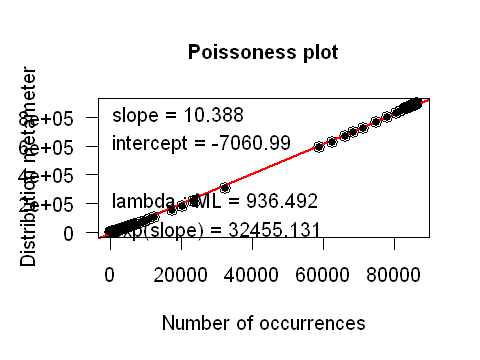

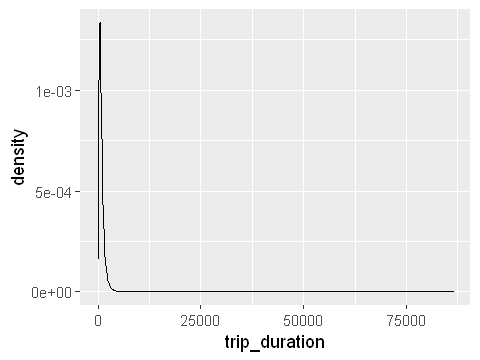

Median of trip_duration in Seconds: Median 
   662 


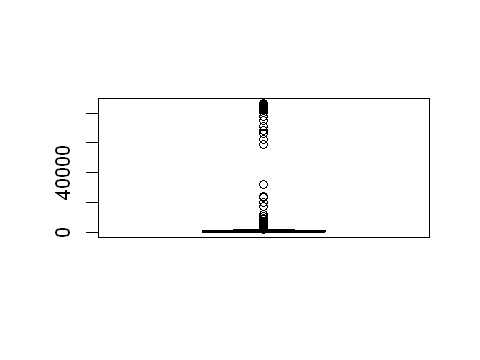

In [10]:
## formatting target variable 'trip_duration'
# Dr. Zhang suggestion comment, "Since we mainly use classification- 
# methods, I suggest you convert your Ride Duration to Long/Short."

#### Some plots to decide where to cutoff for short and long -- 'trip_duration' ####
# distribution plot
distplot(new_train_data$trip_duration)

# density plot
dens_dist <- ggplot(new_train_data, aes(x=trip_duration)) +
  geom_density()
dens_dist

# boxplot
boxplot(new_train_data$trip_duration)

summary_trip_duration <- summary(new_train_data$trip_duration)
# print(summary_trip_duration)
median_trip_duration <- summary_trip_duration['Median']
max_trip_duration <- summary_trip_duration['Max.']
cat('Median of trip_duration in Seconds: ')
print(median_trip_duration)

In [11]:
cat('Changing regression problem to classification problem: \n')
new_train_data$trip_duration <- cut(new_train_data$trip_duration,
                                    breaks=c(0, 6000, max_trip_duration),
                                    labels=c("Short Trip","Long Trip"))

Changing regression problem to classification problem: 


### Distance Travelled during each Trip based on features like:
- 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude' 

In [12]:
## 'Distance Travelled during each Trip' using
# 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude' features

i  <- cbind(pick_longitude = new_train_data$pickup_longitude,
            pick_latitude = new_train_data$pickup_latitude)
j <- cbind(drop_longitude = new_train_data$dropoff_longitude,
           drop_latitude = new_train_data$dropoff_latitude)

#computing haversine distance from co-ordinates
new_train_data$distance <- distHaversine(i, j)

### Insight of Target Variable

In [13]:

## Analyis of "trip_duration" target/dependent variable
cat('Summary of Trip Duration: \n')
print(summary(new_train_data$trip_duration))

Summary of Trip Duration: 
Short Trip  Long Trip 
     69887        113 


### Analysis of Independent Features

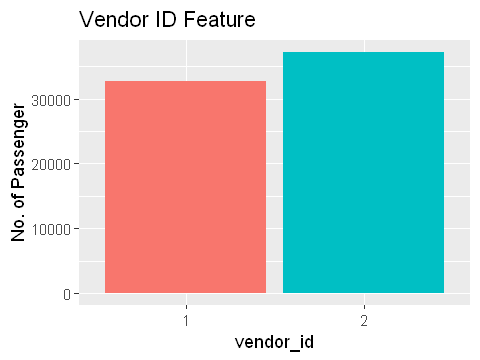

In [14]:
## Analysis of independent variable features

# 'vender_id' feature
vendorID <- new_train_data %>%
  group_by(vendor_id) %>%
  count() 

vendorID %>% ggplot(aes(x=factor(vendor_id), y=n))+
  geom_col(aes(fill = factor(vendor_id))) +
  ggtitle("Vendor ID Feature") +
  xlab("vendor_id") +
  ylab("No. of Passenger") +
  theme(legend.position = "none")

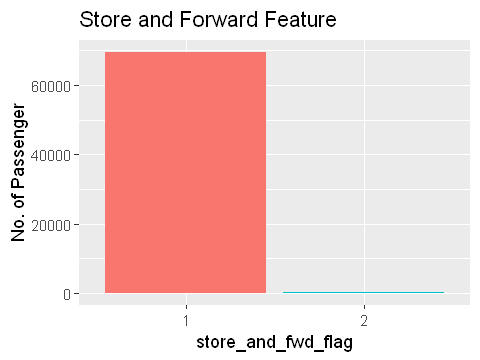

In [15]:
# 'store_and_fwd_flag' feature
store_flag <- new_train_data %>%
  group_by(store_and_fwd_flag) %>%
  count()

store_flag %>% ggplot(aes(x=factor(store_and_fwd_flag), y=n))+
  geom_col(aes(fill = factor(store_and_fwd_flag))) +
  ggtitle("Store and Forward Feature") +
  xlab("store_and_fwd_flag") +
  ylab("No. of Passenger") +
  theme(legend.position = "none")


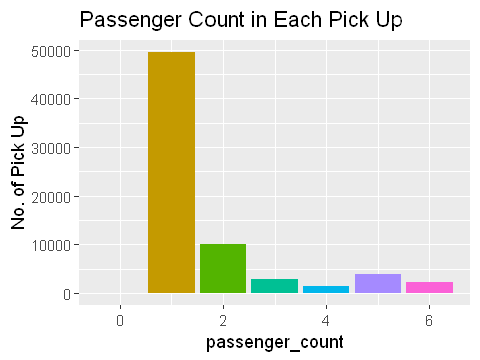

In [16]:
# 'passenger_count' feature
passeng_count <- new_train_data %>%
  group_by(passenger_count) %>%
  count() 

passeng_count %>% ggplot(aes(x=passenger_count, y=n))+
  geom_col(aes(fill = factor(passenger_count)))+
  ggtitle("Passenger Count in Each Pick Up") +
  xlab("passenger_count") +
  ylab("No. of Pick Up") +
  theme(legend.position = "none")

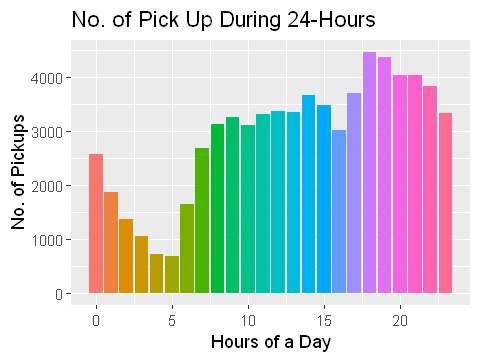

In [17]:
# 'Number of Pickup' in 24-Hours
new_train_data$hour_24 <- hour(new_train_data$pickup_datetime)
num_pickup_24 <- new_train_data %>%
  group_by(hour_24) %>%
  count()

num_pickup_24 %>%
  ggplot(aes(x=hour_24, y=n)) +
  geom_col(aes(fill = factor(hour_24))) +
  ggtitle("No. of Pick Up During 24-Hours") +
  xlab("Hours of a Day") +
  ylab("No. of Pickups") +
  theme(legend.position = "none")

#### 'Pickup_datetime' features exploration

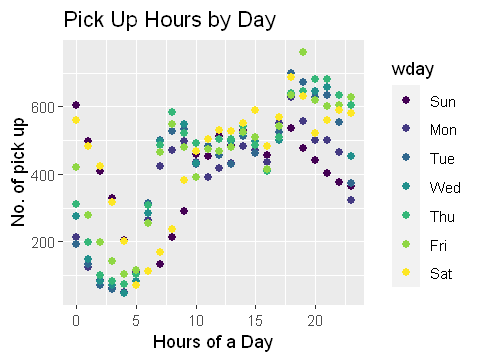

In [18]:
##### 'pickup_datetime' feature
num_pickup_24hours_day <- new_train_data %>%
  mutate(hpick = hour(pickup_datetime),
         wday  = factor(wday(pickup_datetime, label=TRUE))) %>%
  group_by(hpick, wday) %>%
  count()

num_pickup_24hours_day %>% ggplot(aes(x=hpick, y=n, color=wday)) +
  geom_point(size=2) +
  ggtitle("Pick Up Hours by Day") +
  xlab("Hours of a Day") +
  ylab("No. of pick up")

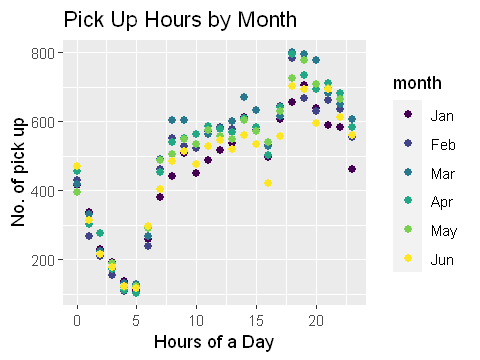

In [19]:
num_pickup_24hours_month <- new_train_data %>%
  mutate(hpick = hour(pickup_datetime),
         month  = factor(month(pickup_datetime, label=TRUE))) %>%
  group_by(hpick, month) %>%
  count()

num_pickup_24hours_month %>% ggplot(aes(x=hpick, y=n, color=month)) +
  geom_point(size=2) +
  ggtitle("Pick Up Hours by Month") +
  xlab("Hours of a Day") +
  ylab("No. of pick up")


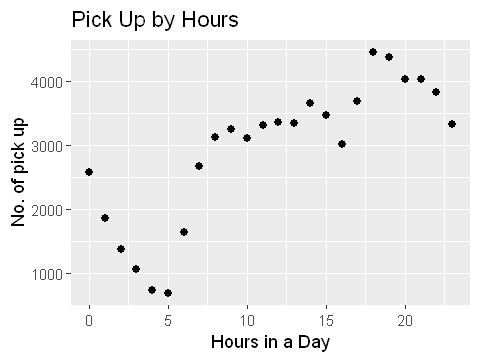

In [20]:
new_train_data %>%
  mutate(hpick = hour(pickup_datetime)) %>%
  group_by(hpick) %>%
  count() %>%
  ggplot(aes(x=hpick, y=n)) +
  geom_point(size=2) +
  ggtitle("Pick Up by Hours") +
  xlab("Hours in a Day") +
  ylab("No. of pick up")


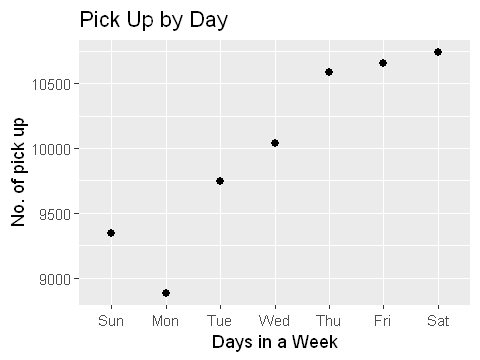

In [21]:
new_train_data %>%
  mutate(wday  = factor(wday(pickup_datetime, label=TRUE))) %>%
  group_by(wday) %>%
  count() %>%
  ggplot(aes(x=wday, y=n)) +
  geom_point(size=2) +
  ggtitle("Pick Up by Day") +
  xlab("Days in a Week") +
  ylab("No. of pick up")

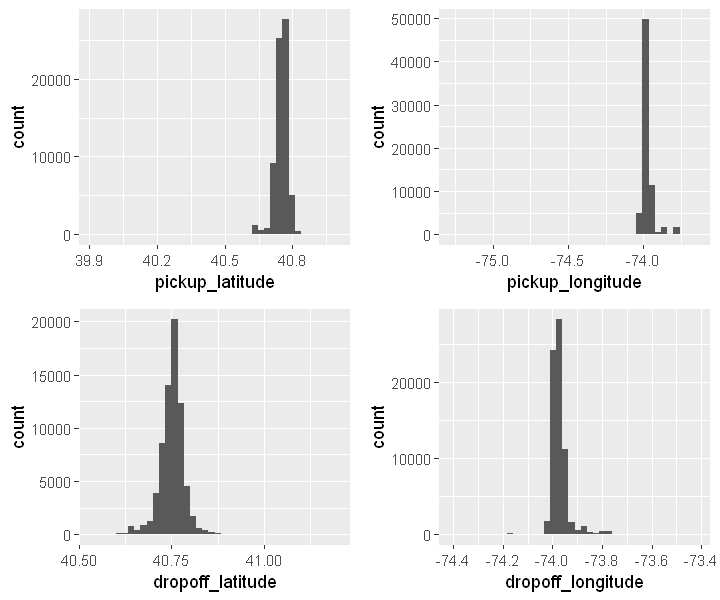

In [22]:
# 'pickup_latitude', pickup_longitude', dropoff_latitude', 'dropoff_longitude' features
options(repr.plot.width = 6, repr.plot.height = 5)
p1 <- new_train_data %>%
  filter(pickup_latitude > min(new_train_data$pickup_latitude) &
          pickup_latitude < max(new_train_data$pickup_latitude)) %>%
  ggplot(aes(x=pickup_latitude)) +
  geom_histogram(bins=40)

p2 <- new_train_data %>%
  filter(pickup_longitude > min(new_train_data$pickup_longitude) &
           pickup_longitude < max(new_train_data$pickup_longitude)) %>%
  ggplot(aes(x=pickup_longitude)) +
  geom_histogram(bins=40)

p3 <- new_train_data %>%
  filter(dropoff_latitude > min(new_train_data$dropoff_latitude) &
           dropoff_latitude < max(new_train_data$dropoff_latitude)) %>%
  ggplot(aes(x=dropoff_latitude)) +
  geom_histogram(bins=40)

p4 <- new_train_data %>%
  filter(dropoff_longitude > min(new_train_data$dropoff_longitude) &
           dropoff_longitude < max(new_train_data$dropoff_longitude)) %>%
  ggplot(aes(x=dropoff_longitude)) +
  geom_histogram(bins=40)

grid.arrange(p1, p2, p3, p4)

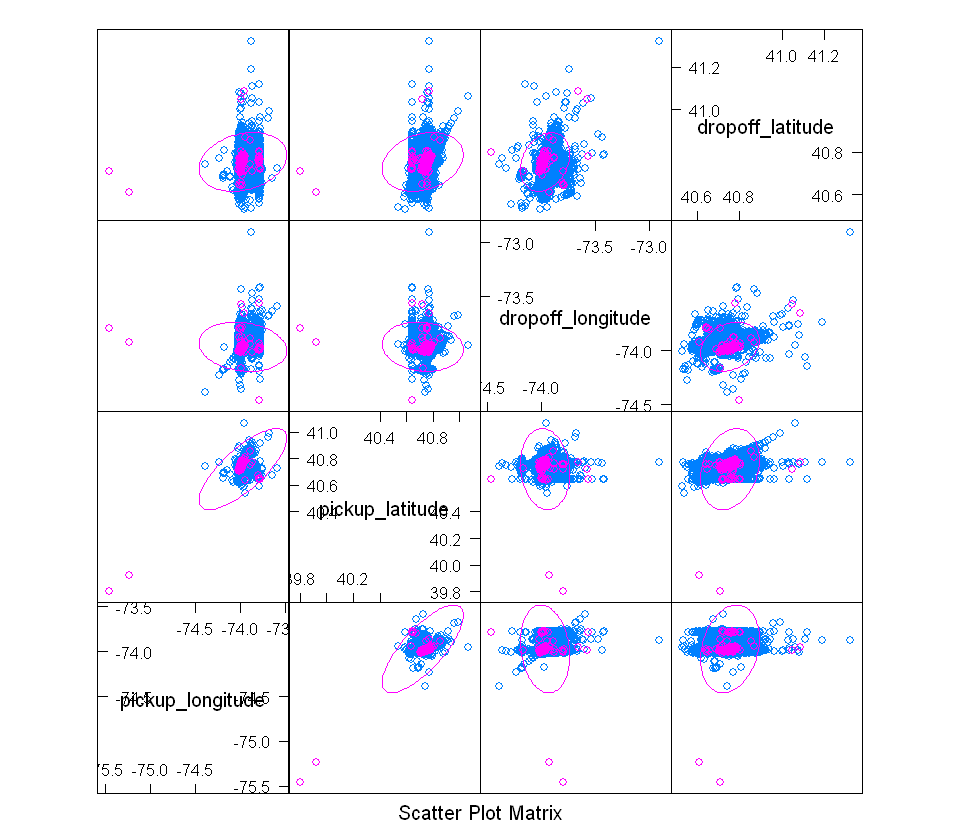

In [23]:
# featuresplot, #scatterplot matrix
options(repr.plot.width = 8, repr.plot.height = 7)
featurePlot(x=new_train_data[,6:9], y=new_train_data[,11], plot="ellipse")


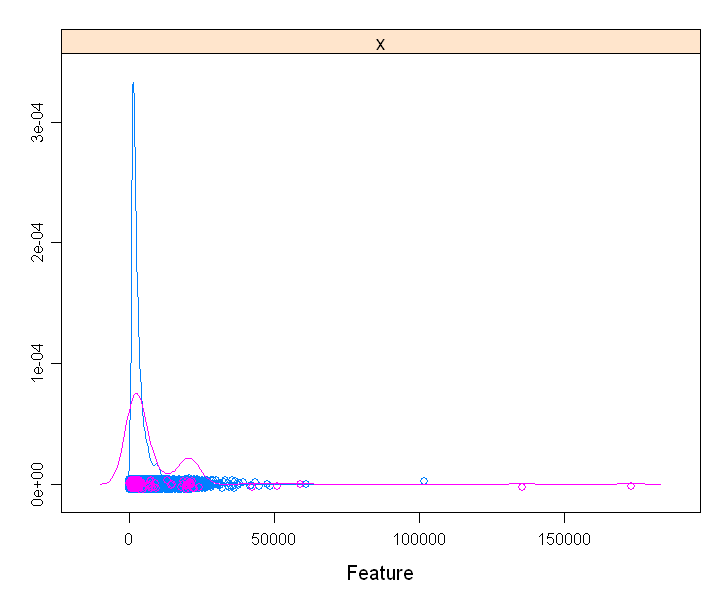

In [24]:
# density plots for each attribute by class value
options(repr.plot.width = 6, repr.plot.height = 5)
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=new_train_data[,12], y=new_train_data[,11], plot="density", scales=scales)

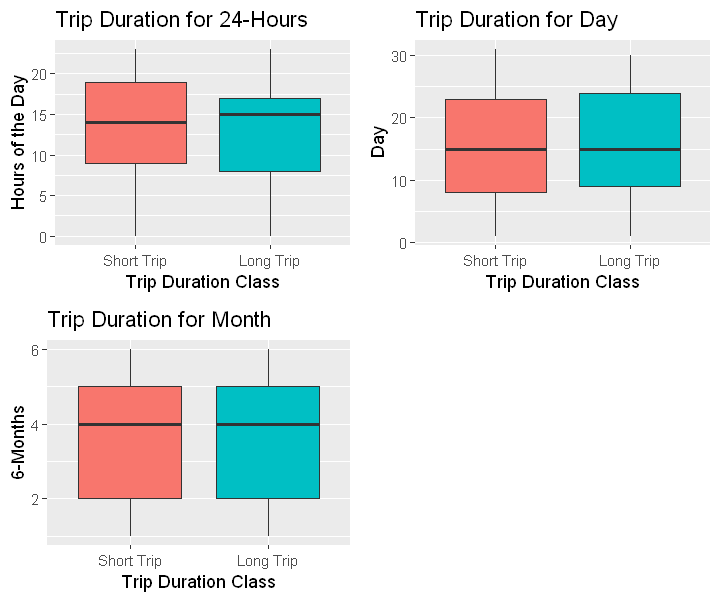

In [25]:
## Relationship between different features with 'trip_duration'
options(repr.plot.width = 6, repr.plot.height = 5)
b1 <- ggplot(data = new_train_data,
             aes(x=trip_duration, y=hour(pickup_datetime),
                 fill=trip_duration)) +
  geom_boxplot() +
  ggtitle("Trip Duration for 24-Hours") +
  xlab("Trip Duration Class") +
  ylab("Hours of the Day") +
  theme(legend.position="none")

b2 <- ggplot(data = new_train_data,
             aes(x=trip_duration, y=day(pickup_datetime),
                 fill=trip_duration)) +
  geom_boxplot() +
  ggtitle("Trip Duration for Day") +
  xlab("Trip Duration Class") +
  ylab("Day") +
  theme(legend.position="none")

b3 <- ggplot(data = new_train_data,
             aes(x=trip_duration, y=month(pickup_datetime),
                 fill=trip_duration)) +
  geom_boxplot() +
  ggtitle("Trip Duration for Month") +
  xlab("Trip Duration Class") +
  ylab("6-Months") +
  theme(legend.position="none")

grid.arrange(b1, b2, b3, ncol=2)


In [26]:
###############################################################################################
## Model Preparation

# create a validation dataset from 'new_train_data'
# 70 % 'new_train_data' data
print(colnames(new_train_data))
new_train_data <- new_train_data[, -which(names(new_train_data) 
                                          %in% c("id","distance")) ]
sample_size <- floor(0.7 * nrow(new_train_data))

# randomly select index of observations for training
training_index_2 <- sample(nrow(new_train_data), size=sample_size, replace=FALSE)
train <- new_train_data[training_index_2, ]
validation <- new_train_data[-training_index_2, ]

 [1] "id"                 "vendor_id"          "pickup_datetime"   
 [4] "dropoff_datetime"   "passenger_count"    "pickup_longitude"  
 [7] "pickup_latitude"    "dropoff_longitude"  "dropoff_latitude"  
[10] "store_and_fwd_flag" "trip_duration"      "distance"          
[13] "hour_24"           


In [27]:
# Run algorithms using 5-fold cross validation
control <- trainControl(method="cv", number=5)
metric <- "Accuracy"


In [28]:
# linear algorithms 
set.seed(123)
lda.model <- train(as.factor(trip_duration)~., data=train, method="lda", 
                 metric=metric, trControl=control)


In [29]:
# kNN
set.seed(123)
knn.model <- train(as.factor(trip_duration)~., data=train, method="knn",
                 metric=metric, trControl=control)


In [30]:
# # SVM
# set.seed(123)
# svm.model <- train(as.factor(trip_duration)~., data=train, method="svmRadial",
#                  metric=metric, trControl=control)

In [31]:
# #naive bayes
# set.seed(123)
# naiveBayes.model <- train(as.factor(trip_duration)~., data=train, method="nb",
#                           metric=metric, trControl=control)


In [32]:
# # Random Forest
# set.seed(123)
# fit.rf <- train(as.factor(trip_duration)~., data=train, method="rf", 
#                 metric=metric, trControl=control)

In [33]:
## Select best model
# summarize accuracy of models
results_best <- resamples(list(lda=lda.model, knn=knn.model))
print(summary(results_best))



Call:
summary.resamples(object = results_best)

Models: lda, knn 
Number of resamples: 5 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda 0.9994898 0.9994898 0.9994898 0.9995918 0.9996939 0.9997959    0
knn 0.9982653 0.9982655 0.9983672 0.9983265 0.9983673 0.9983673    0

Kappa 
         Min.   1st Qu.    Median     Mean  3rd Qu.      Max. NA's
lda 0.8145681 0.8145681 0.8273383 0.858556 0.903074 0.9332316    0
knn 0.0000000 0.0000000 0.0000000 0.000000 0.000000 0.0000000    0



In [34]:
# summarize Best Model
print(lda.model)

Linear Discriminant Analysis 

49000 samples
   10 predictor
    2 classes: 'Short Trip', 'Long Trip' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 39201, 39200, 39199, 39200, 39200 
Resampling results:

  Accuracy   Kappa   
  0.9995918  0.858556



In [35]:
# prediction on the validation dataset
predictions <- predict(lda.model, validation)

# pick actual value and predicted value together in a dataframe
# called results
results <- data.frame(actual = validation[, 'trip_duration'],
                      predicted = predictions)
# confusion matrix
print(table(results))

            predicted
actual       Short Trip Long Trip
  Short Trip      20969         0
  Long Trip          10        21


In [36]:
# Accuracy
mean(results$actual == results$predicted)

[1] 0.9995238